In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

from sklearn.calibration import CalibratedClassifierCV

In [111]:
data_X = pd.read_csv('X_train.csv')
data_y = pd.read_csv('y_train.csv')

In [112]:
print(data_X.shape)
display(data_X.head())
display(data_X.tail())

(487680, 13)


,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410


,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
487675,3809_123,3809,123,0.62871,-0.76878,-0.084391,0.081093,0.003167,0.093760,-0.14274,3.27180,2.0115,-9.0063
487676,3809_124,3809,124,0.62884,-0.76868,-0.084365,0.081099,0.014994,0.032637,-0.13238,4.42750,3.0696,-8.1257
487677,3809_125,3809,125,0.62891,-0.76861,-0.084345,0.081178,-0.031184,-0.003961,-0.13894,2.70480,4.2622,-8.1443
487678,3809_126,3809,126,0.62903,-0.76850,-0.084414,0.081231,-0.069153,0.013229,-0.13021,2.54100,4.7130,-9.4435
487679,3809_127,3809,127,0.62915,-0.76839,-0.084441,0.081284,-0.042769,0.034049,-0.12580,0.82391,4.2751,-10.4980


In [113]:
data_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487680 entries, 0 to 487679
Data columns (total 13 columns):
row_id                   487680 non-null object
series_id                487680 non-null int64
measurement_number       487680 non-null int64
orientation_X            487680 non-null float64
orientation_Y            487680 non-null float64
orientation_Z            487680 non-null float64
orientation_W            487680 non-null float64
angular_velocity_X       487680 non-null float64
angular_velocity_Y       487680 non-null float64
angular_velocity_Z       487680 non-null float64
linear_acceleration_X    487680 non-null float64
linear_acceleration_Y    487680 non-null float64
linear_acceleration_Z    487680 non-null float64
dtypes: float64(10), int64(2), object(1)
memory usage: 48.4+ MB


**Observation:** There are no null values, and 487680 records are there

In [114]:
data_X.describe()

,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
count,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000
mean,1904.500000,63.500000,-0.018050,0.075062,0.012458,-0.003804,0.000178,0.008338,-0.019184,0.129281,2.886468,-9.364886
std,1099.853353,36.949327,0.685696,0.708226,0.105972,0.104299,0.117764,0.088677,0.229153,1.870600,2.140067,2.845341
min,0.000000,0.000000,-0.989100,-0.989650,-0.162830,-0.156620,-2.371000,-0.927860,-1.268800,-36.067000,-121.490000,-75.386000
25%,952.000000,31.750000,-0.705120,-0.688980,-0.089466,-0.106060,-0.040752,-0.033191,-0.090743,-0.530833,1.957900,-10.193000
50%,1904.500000,63.500000,-0.105960,0.237855,0.031949,-0.018704,0.000084,0.005412,-0.005335,0.124980,2.879600,-9.365300
75%,2857.000000,95.250000,0.651803,0.809550,0.122870,0.097215,0.040527,0.048068,0.064604,0.792263,3.798800,-8.522700
max,3809.000000,127.000000,0.989100,0.988980,0.155710,0.154770,2.282200,1.079100,1.387300,36.797000,73.008000,65.839000


In [115]:
print(data_y.shape)
display(data_y.head())
display(data_y.tail())

(3810, 3)


,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles


,series_id,group_id,surface
3805,3805,55,tiled
3806,3806,67,wood
3807,3807,48,fine_concrete
3808,3808,54,tiled
3809,3809,56,soft_pvc


In [116]:
# merging the source and target data
data = data_X.merge(data_y, on='series_id' )
print(data.shape)
data.head()

(487680, 15)


,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,group_id,surface
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532,13,fine_concrete
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128,13,fine_concrete
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267,13,fine_concrete
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960,13,fine_concrete
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410,13,fine_concrete


In [118]:
# data['measurement_number'].unique()
# print(list(data['measurement_number']))


In [119]:
# data['measurement_number'].value_counts()

In [121]:
# np.sort(data['group_id'].unique())

In [122]:
data['surface'].nunique()

9

In [123]:
data['surface'].value_counts()

concrete                  99712
soft_pvc                  93696
wood                      77696
tiled                     65792
fine_concrete             46464
hard_tiles_large_space    39424
soft_tiles                38016
carpet                    24192
hard_tiles                 2688
Name: surface, dtype: int64

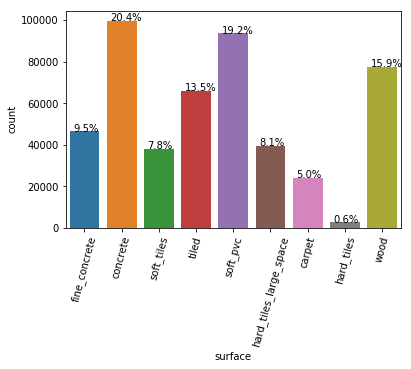

In [124]:
g = sns.countplot(x='surface', data=data)
plt.xticks(rotation=75);

total = len(data)
for p in g.patches:
    g.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+10))
        
# #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
# g.yaxis.set_ticks(np.linspace(0, total, 11))

# #adjust the ticklabel to the desired format, without changing the position of the ticks. 
# g.set_yticklabels(map('{:.1f}%'.format, 100*g.yaxis.get_majorticklocs()/total))
# plt.show()

**Observation:** imbalance data

In [125]:
# let's change class labels ot numeric
labels={'fine_concrete':0, 'concrete':1, 'soft_tiles':2, 'tiled':3, 'soft_pvc':4,
       'hard_tiles_large_space':5, 'carpet':6, 'hard_tiles':7, 'wood':8}

data['surface'] = data['surface'].map(labels)

In [128]:
data.head(2)

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,group_id,surface
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532,13,0
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128,13,0


In [126]:
data.columns

Index(['row_id', 'series_id', 'measurement_number', 'orientation_X',
       'orientation_Y', 'orientation_Z', 'orientation_W', 'angular_velocity_X',
       'angular_velocity_Y', 'angular_velocity_Z', 'linear_acceleration_X',
       'linear_acceleration_Y', 'linear_acceleration_Z', 'group_id',
       'surface'],
      dtype='object')

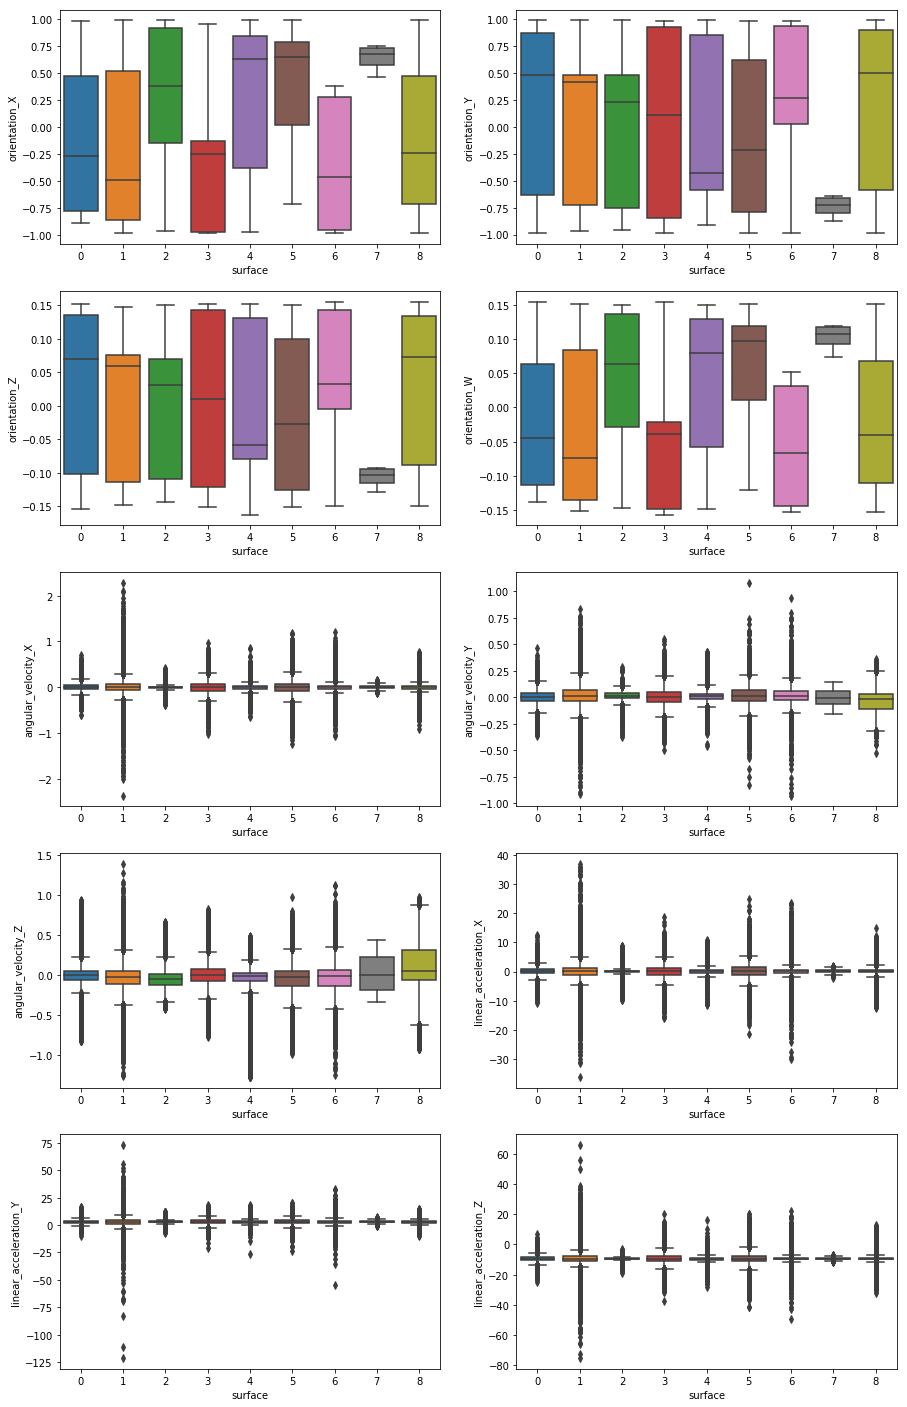

In [194]:
cols = ['orientation_X', 'orientation_Y', 'orientation_Z', 'orientation_W', 'angular_velocity_X', 'angular_velocity_Y',
        'angular_velocity_Z', 'linear_acceleration_X', 'linear_acceleration_Y', 'linear_acceleration_Z',]
i = 1
plt.figure(figsize=(15,25))
for col in cols:
    plt.subplot(5,2, i)
    sns.boxplot(x="surface", y=col, data=data)
    i+=1

In [107]:
# xtsne = TSNE(perplexity=50)
# results = xtsne.fit_transform(data.loc[:,cols])

In [106]:
# vis_x = results[:, 0]
# vis_y = results[:, 1]
# plt.scatter(vis_x, vis_y, s=2, c=data['surface'], cmap=plt.cm.get_cmap("jet", 9))
# plt.colorbar(ticks=range(10))
# plt.clim(0.5, 9)
# plt.show()

# Basic Model without Feature Engineering

In [138]:
X_train = data.loc[0:390144, cols]
y_train = data.loc[0:390144, 'surface']

X_cv = data.loc[390144: , cols]
y_cv = data.loc[390144: , 'surface']
train.shape, cv.shape

((390145, 10), (97536,))

In [171]:
alpha=[100]#,50,100,500, 700]
cv_accuracy_array=[]

for i in tqdm(alpha):
    x_cfl = XGBClassifier(n_estimators=i, n_jobs=-1, num_class=9, use_label_encoder=False)
    x_cfl.fit(X_train,y_train.values )
    
    predict_y = x_cfl.predict(X_cv)
    
    cv_accuracy_array.append(accuracy_score(y_cv.values, predict_y))

for i in range(len(cv_accuracy_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_accuracy_array[i])




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

[08:16:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.





100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [07:32<00:00, 452.29s/it]




log_loss for c =  100 is 0.7970082841207349


In [181]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100, '%')
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
  
    B =(C/C.sum(axis=0))
   
    
    labels = [0,1,2,3,4,5,6,7,8]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

Number of misclassified points  20.29917158792651 %


C:\Users\Nehal\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


-------------------------------------------------- Confusion matrix --------------------------------------------------


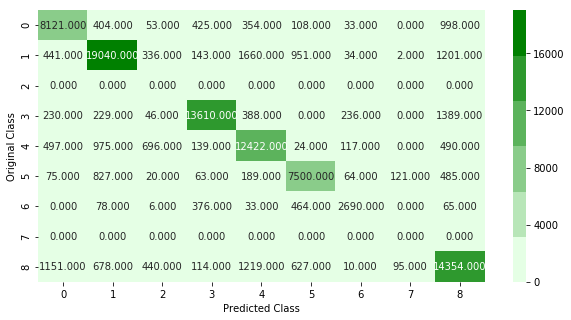

-------------------------------------------------- Precision matrix --------------------------------------------------


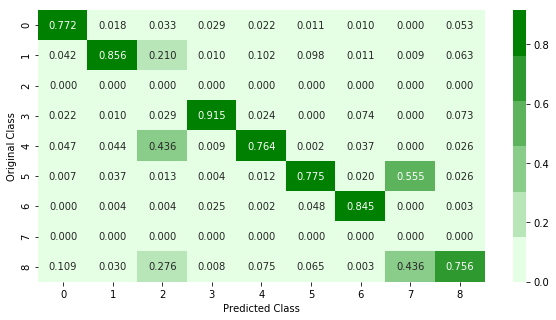

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


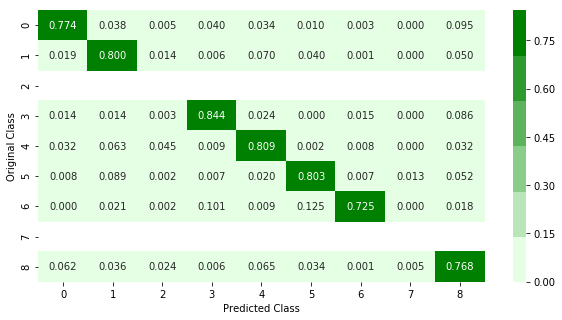

Sum of rows in precision matrix [ 1.  1. nan  1.  1.  1.  1. nan  1.]


In [182]:
plot_confusion_matrix(y_cv, predict_y)

# Feature Engineering